In [39]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [40]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [41]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
# from sqlautomap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy.sql.functions import func
from sqlalchemy import create_engine, func

In [42]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [43]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_33520\930725367.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [44]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [45]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [46]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [47]:
# Find the most recent date in the data set.
recent = session.query(func.max(measurement.date)).scalar()
print(recent)

2017-08-23


In [48]:
from datetime import datetime, timedelta

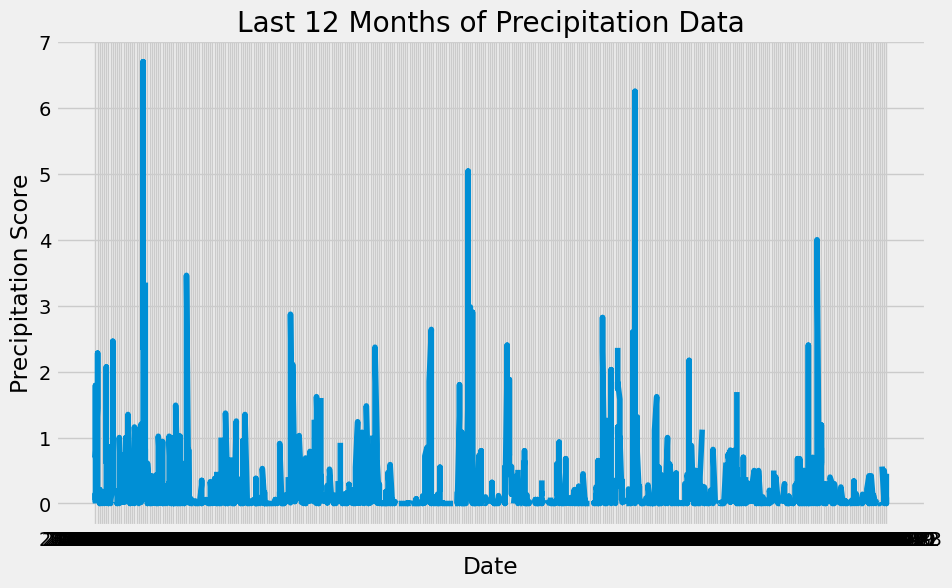

In [49]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Calculate the date one year from the most recent date
one_year = dt.date(2017, 8, 23) - timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
twelve_recent = session.query(measurement.date, measurement.prcp).filter(
    measurement.date >= one_year,
    measurement.date <= recent).order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(twelve_recent, columns=['date', 'precipitation_score'])

# Sort the dataframe by date
precipitation_df.sort_values(by='date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.plot(precipitation_df['date'], precipitation_df['precipitation_score'])
plt.xlabel('Date')
plt.ylabel('Precipitation Score')
plt.title('Last 12 Months of Precipitation Data')
plt.show()

In [50]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation_score
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [56]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(station.id)).scalar()
station_count

9

In [66]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count().label('count')).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [70]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = 'USC00519281'
temps = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == most_active).all()
temps

[(54.0, 85.0, 71.66378066378067)]

C:\Users\Dell\AppData\Local\Temp\ipykernel_33520\1141049418.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


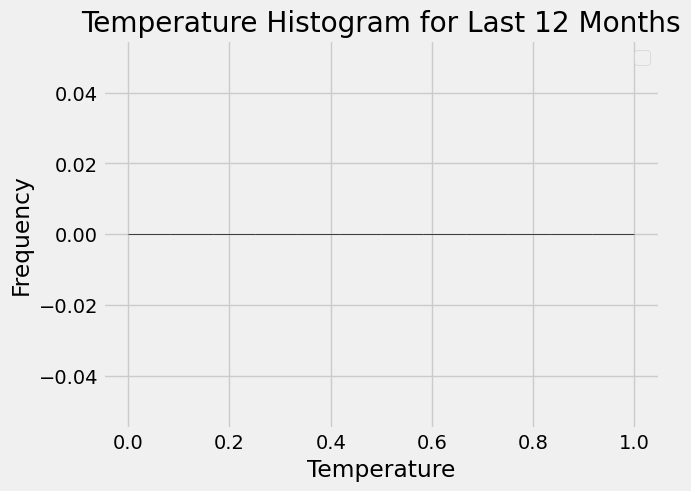

In [74]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
date_12_months_ago = datetime.now() - timedelta(days=365)

last_12_months_temps = session.query(measurement.tobs).\
    filter(measurement.station == most_active).\
    filter(measurement.date >= date_12_months_ago).\
    all()

temps = [temp[0] for temp in last_12_months_temps]

# Create a histogram of the temperature data
plt.hist(temps, bins=12, edgecolor='black')

# Set the title and labels
plt.title("Temperature Histogram for Last 12 Months")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()

Text(0.5, 4.183333333333314, 'Temperature')

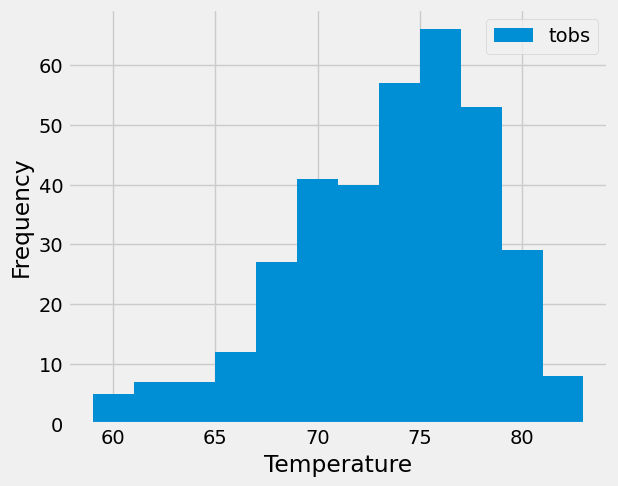

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
date_12_months_ago = datetime.now() - timedelta(days=365)

last_12_months_temps = session.query(measurement.tobs).\
    filter(measurement.station == most_active).\
    filter(measurement.date >= date_12_months_ago).\
    all()

temps = [temp[0] for temp in last_12_months_temps]

# Create a histogram of the temperature data
plt.hist(temps, bins=12, edgecolor='black')

# Set the title and labels
plt.title("Temperature Histogram for Last 12 Months")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")

# Show the plot
plt.show()


# Close Session

In [16]:
# Close Session
session.close()